In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
wal_mart = pd.read_csv('Walmart Data Analysis and Forcasting.csv')

In [4]:
wal_mart.head()

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106

In [5]:
wal_mart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [8]:
wal_mart['Store'].value_counts().head()

1     143
24    143
26    143
27    143
28    143
Name: Store, dtype: int64

In [9]:
wal_mart['Store'].nunique()

45

In [13]:
wal_mart['Weekly_Sales'].value_counts()

1643690.90    1
446751.45     1
1332261.01    1
1366193.35    1
1384870.51    1
             ..
551799.63     1
573498.64     1
553901.97     1
533161.64     1
760281.43     1
Name: Weekly_Sales, Length: 6435, dtype: int64

In [16]:
wal_mart['Holiday_Flag'].value_counts()

0    5985
1     450
Name: Holiday_Flag, dtype: int64

In [20]:
wal_mart['Temperature'].nunique()

3528

In [21]:
wal_mart['Fuel_Price'].value_counts()

3.638    39
3.630    34
2.771    29
3.891    29
3.524    28
         ..
2.863     1
2.995     1
3.053     1
3.448     1
3.576     1
Name: Fuel_Price, Length: 892, dtype: int64

In [23]:
wal_mart['CPI'].value_counts()

130.550207    11
129.043200    11
127.580032    11
127.440484    11
127.300935    11
              ..
214.751084     1
214.815521     1
214.961638     1
215.107755     1
214.741539     1
Name: CPI, Length: 2145, dtype: int64

In [29]:
wal_mart['Unemployment'].max()

14.313

In [26]:
wal_mart['CPI'].mean()

171.57839384878014

In [27]:
wal_mart['CPI'].max()

227.2328068

In [28]:
wal_mart['CPI'].min()

126.064

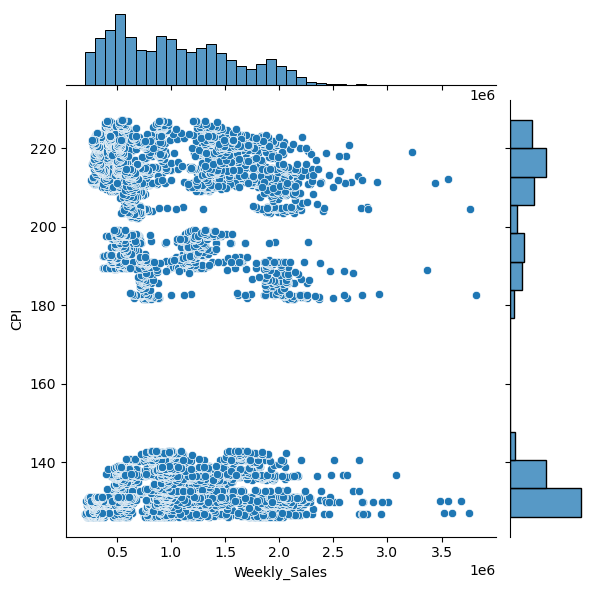

In [34]:
sns.jointplot(x = 'Weekly_Sales',y = 'CPI',data = wal_mart)

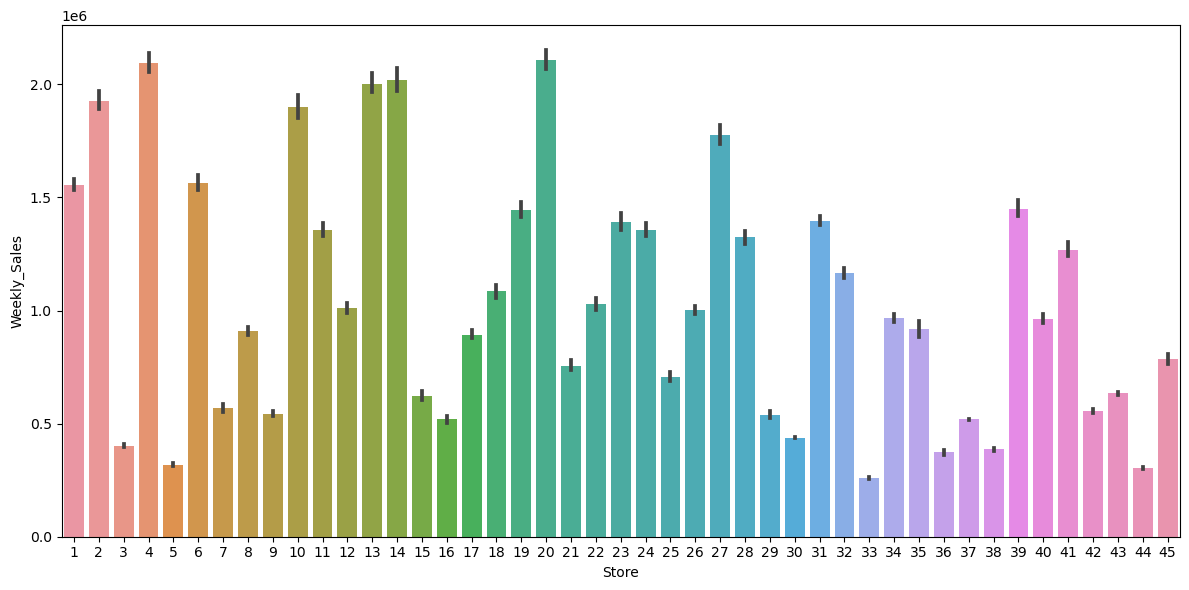

In [39]:
plt.figure(figsize=(12,6))
sns.barplot(x = "Store", y = 'Weekly_Sales',data = wal_mart)
plt.tight_layout()

<Axes: xlabel='Holiday_Flag', ylabel='Weekly_Sales'>

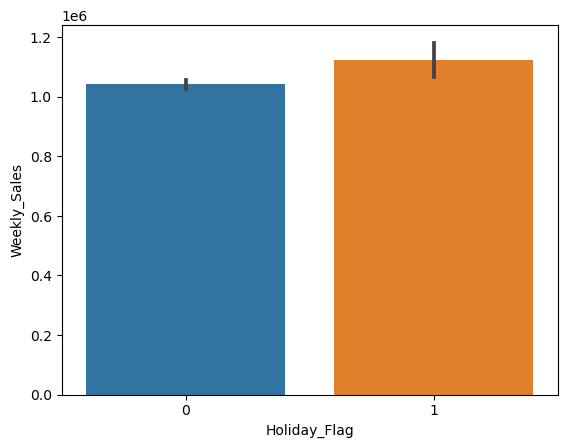

In [43]:
sns.barplot(x = 'Holiday_Flag',y = 'Weekly_Sales',data = wal_mart)

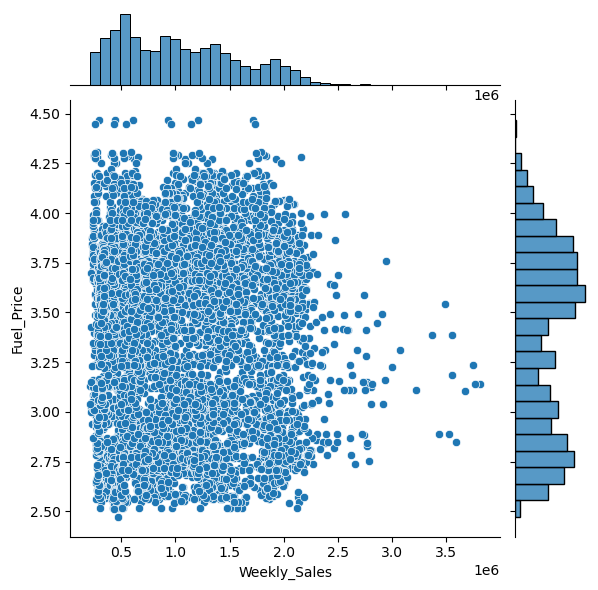

In [44]:
sns.jointplot( x = 'Weekly_Sales',y = 'Fuel_Price',data = wal_mart)

In [46]:
wal_mart['Fuel_Price'].max()

4.468

In [53]:
wal_mart['Weekly_Sales'].value_counts().head()

1643690.90    1
446751.45     1
1332261.01    1
1366193.35    1
1384870.51    1
Name: Weekly_Sales, dtype: int64

In [77]:
wal_mart['Date'] = pd.to_datetime(wal_mart['Date'], format = '%d-%m-%Y')

In [82]:
wal_mart['Year'] = wal_mart['Date'].apply(lambda date : date.year)
wal_mart['Month'] = wal_mart['Date'].apply(lambda date : date.month)
wal_mart['Day Of Week'] =wal_mart['Date'].apply(lambda date : date.dayofweek)

In [83]:
wal_mart.head()

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1 2010-02-05    1643690.90             0        42.31       2.572   
1      1 2010-02-12    1641957.44             1        38.51       2.548   
2      1 2010-02-19    1611968.17             0        39.93       2.514   
3      1 2010-02-26    1409727.59             0        46.63       2.561   
4      1 2010-03-05    1554806.68             0        46.50       2.625   

          CPI  Unemployment  Year  Month  Day Of Week  
0  211.096358         8.106  2010      2            4  
1  211.242170         8.106  2010      2            4  
2  211.289143         8.106  2010      2            4  
3  211.319643         8.106  2010      2            4  
4  211.350143         8.106  2010      3            4

In [85]:
wal_mart['Day Of Week'].value_counts()

4    6435
Name: Day Of Week, dtype: int64

<Axes: xlabel='Year', ylabel='Weekly_Sales'>

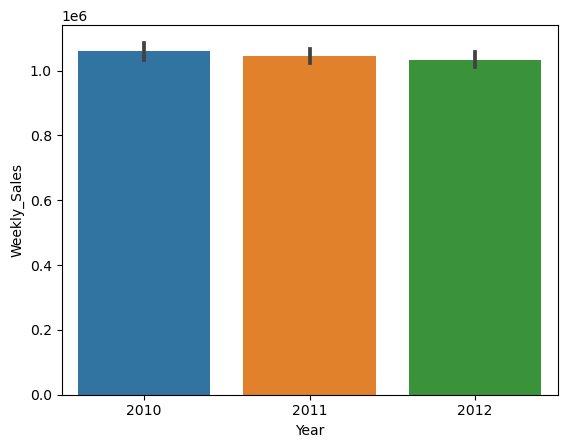

In [89]:
sns.barplot(x = 'Year',y = 'Weekly_Sales',data = wal_mart)

<Axes: xlabel='Month', ylabel='Weekly_Sales'>

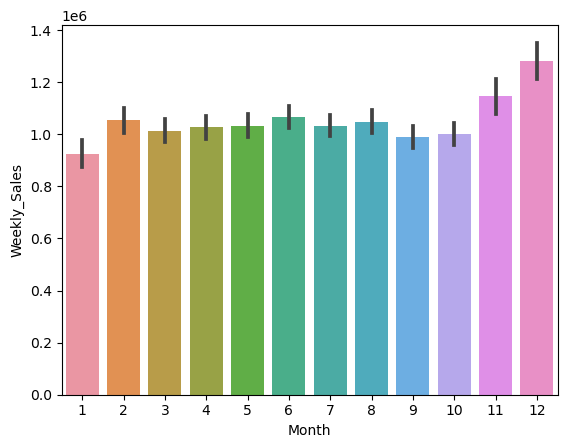

In [90]:
sns.barplot(x = 'Month',y ='Weekly_Sales',data = wal_mart)

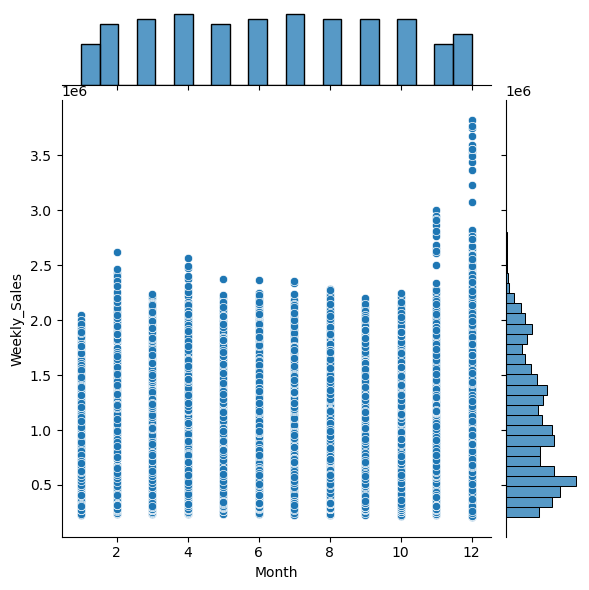

In [94]:
sns.jointplot(x = 'Month',y = 'Weekly_Sales',data = wal_mart)

<Axes: xlabel='Year', ylabel='count'>

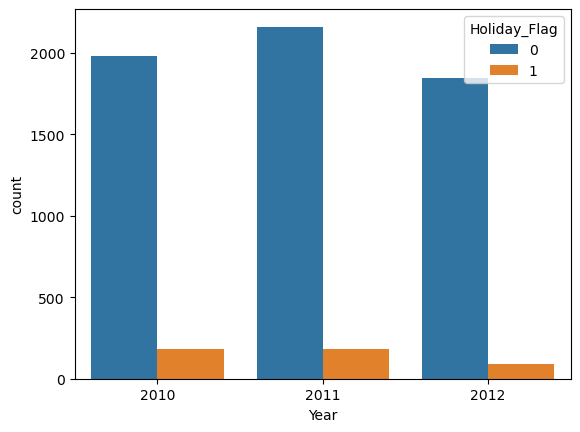

In [95]:
sns.countplot(x = 'Year',hue = 'Holiday_Flag',data = wal_mart)

In [109]:
wal_mart['total_sale'] = (wal_mart['Weekly_Sales'] * wal_mart['CPI'])/100

In [110]:
wal_mart.head()

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1 2010-02-05    1643690.90             0        42.31       2.572   
1      1 2010-02-12    1641957.44             1        38.51       2.548   
2      1 2010-02-19    1611968.17             0        39.93       2.514   
3      1 2010-02-26    1409727.59             0        46.63       2.561   
4      1 2010-03-05    1554806.68             0        46.50       2.625   

          CPI  Unemployment  Year  Month  Day Of Week    total_sale  
0  211.096358         8.106  2010      2            4  3.469772e+06  
1  211.242170         8.106  2010      2            4  3.468507e+06  
2  211.289143         8.106  2010      2            4  3.405914e+06  
3  211.319643         8.106  2010      2            4  2.979031e+06  
4  211.350143         8.106  2010      3            4  3.286086e+06

In [111]:
wal_mart['total_sale'].value_counts().head()

3.469772e+06    1
9.954334e+05    1
2.809383e+06    1
2.883181e+06    1
2.922170e+06    1
Name: total_sale, dtype: int64

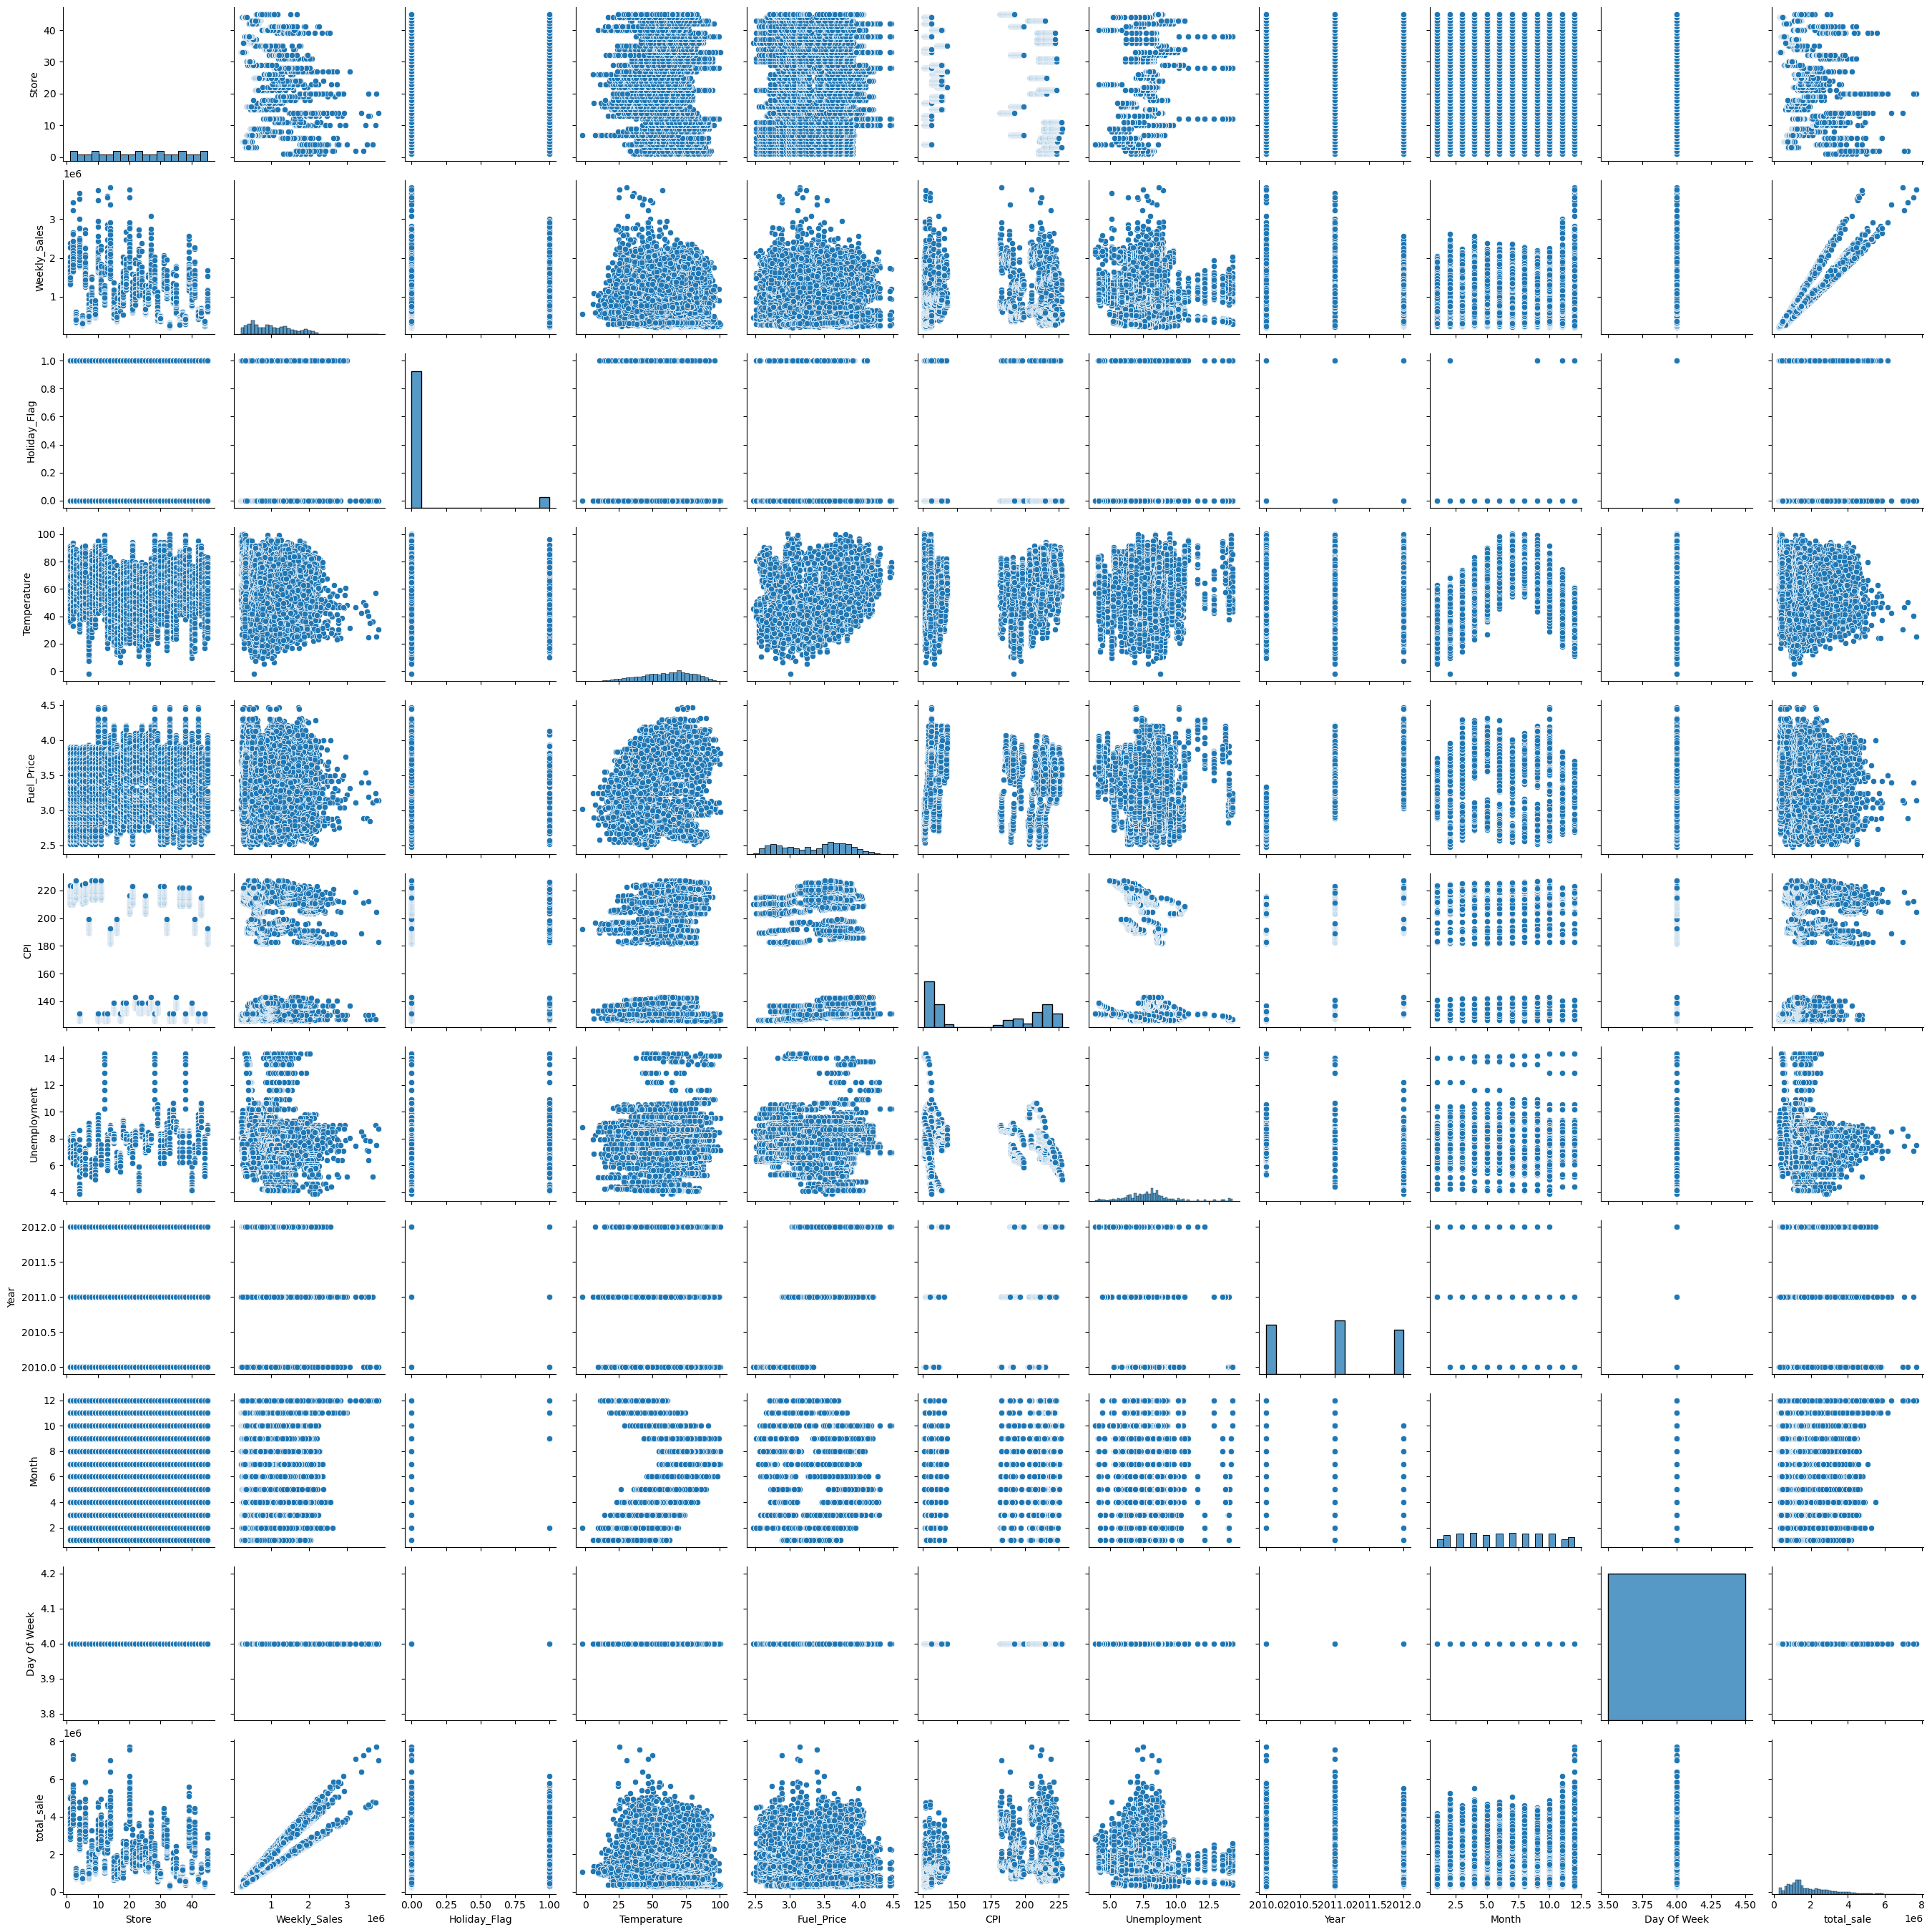

In [112]:
sns.pairplot(data = wal_mart)

In [114]:
wal_mart.drop('Day Of Week',axis = 1,inplace=True)

In [115]:
wal_mart.head()

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1 2010-02-05    1643690.90             0        42.31       2.572   
1      1 2010-02-12    1641957.44             1        38.51       2.548   
2      1 2010-02-19    1611968.17             0        39.93       2.514   
3      1 2010-02-26    1409727.59             0        46.63       2.561   
4      1 2010-03-05    1554806.68             0        46.50       2.625   

          CPI  Unemployment  Year  Month    total_sale  
0  211.096358         8.106  2010      2  3.469772e+06  
1  211.242170         8.106  2010      2  3.468507e+06  
2  211.289143         8.106  2010      2  3.405914e+06  
3  211.319643         8.106  2010      2  2.979031e+06  
4  211.350143         8.106  2010      3  3.286086e+06

<Axes: xlabel='Month', ylabel='count'>

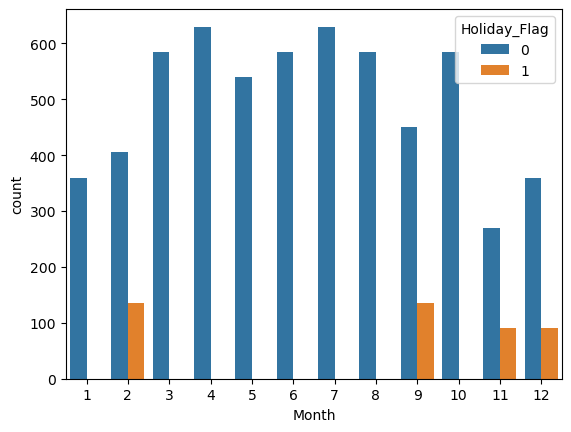

In [117]:
sns.countplot(x ='Month',data = wal_mart,hue = 'Holiday_Flag')

<Axes: xlabel='Year', ylabel='count'>

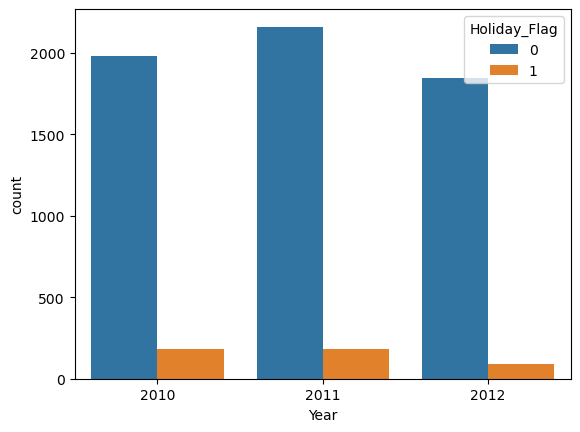

In [118]:
sns.countplot(x = 'Year', hue = 'Holiday_Flag',data = wal_mart)

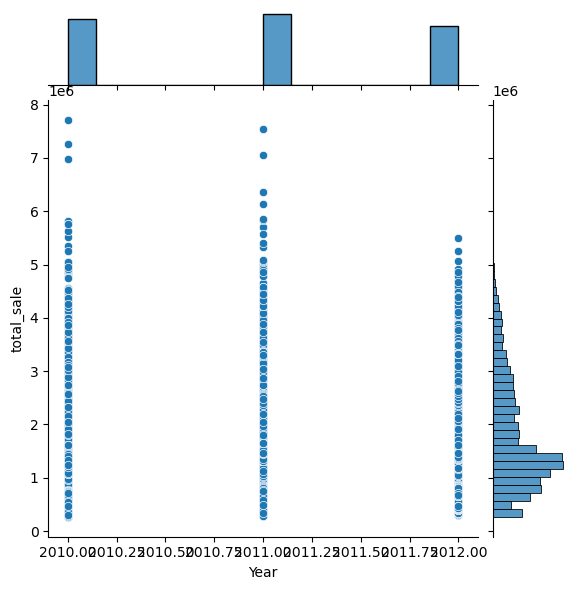

In [125]:
sns.jointplot(x = 'Year',y = 'total_sale',data = wal_mart)

In [126]:
wal_mart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   int64         
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   int64         
 6   CPI           6435 non-null   int64         
 7   Unemployment  6435 non-null   int64         
 8   Year          6435 non-null   int64         
 9   Month         6435 non-null   int64         
 10  total_sale    6435 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(9)
memory usage: 553.1 KB


In [127]:
wal_mart['Weekly_Sales'] = wal_mart['Weekly_Sales'].apply(np.int64)
wal_mart['Fuel_Price'] = wal_mart['Fuel_Price'].apply(np.int64)
wal_mart['CPI'] = wal_mart['CPI'].apply(np.int64)
wal_mart['Unemployment'] = wal_mart['Unemployment'].apply(np.int64)
wal_mart['total_sale'] = wal_mart['total_sale'].apply(np.int64)

In [128]:
wal_mart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   int64         
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   int64         
 6   CPI           6435 non-null   int64         
 7   Unemployment  6435 non-null   int64         
 8   Year          6435 non-null   int64         
 9   Month         6435 non-null   int64         
 10  total_sale    6435 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(9)
memory usage: 553.1 KB


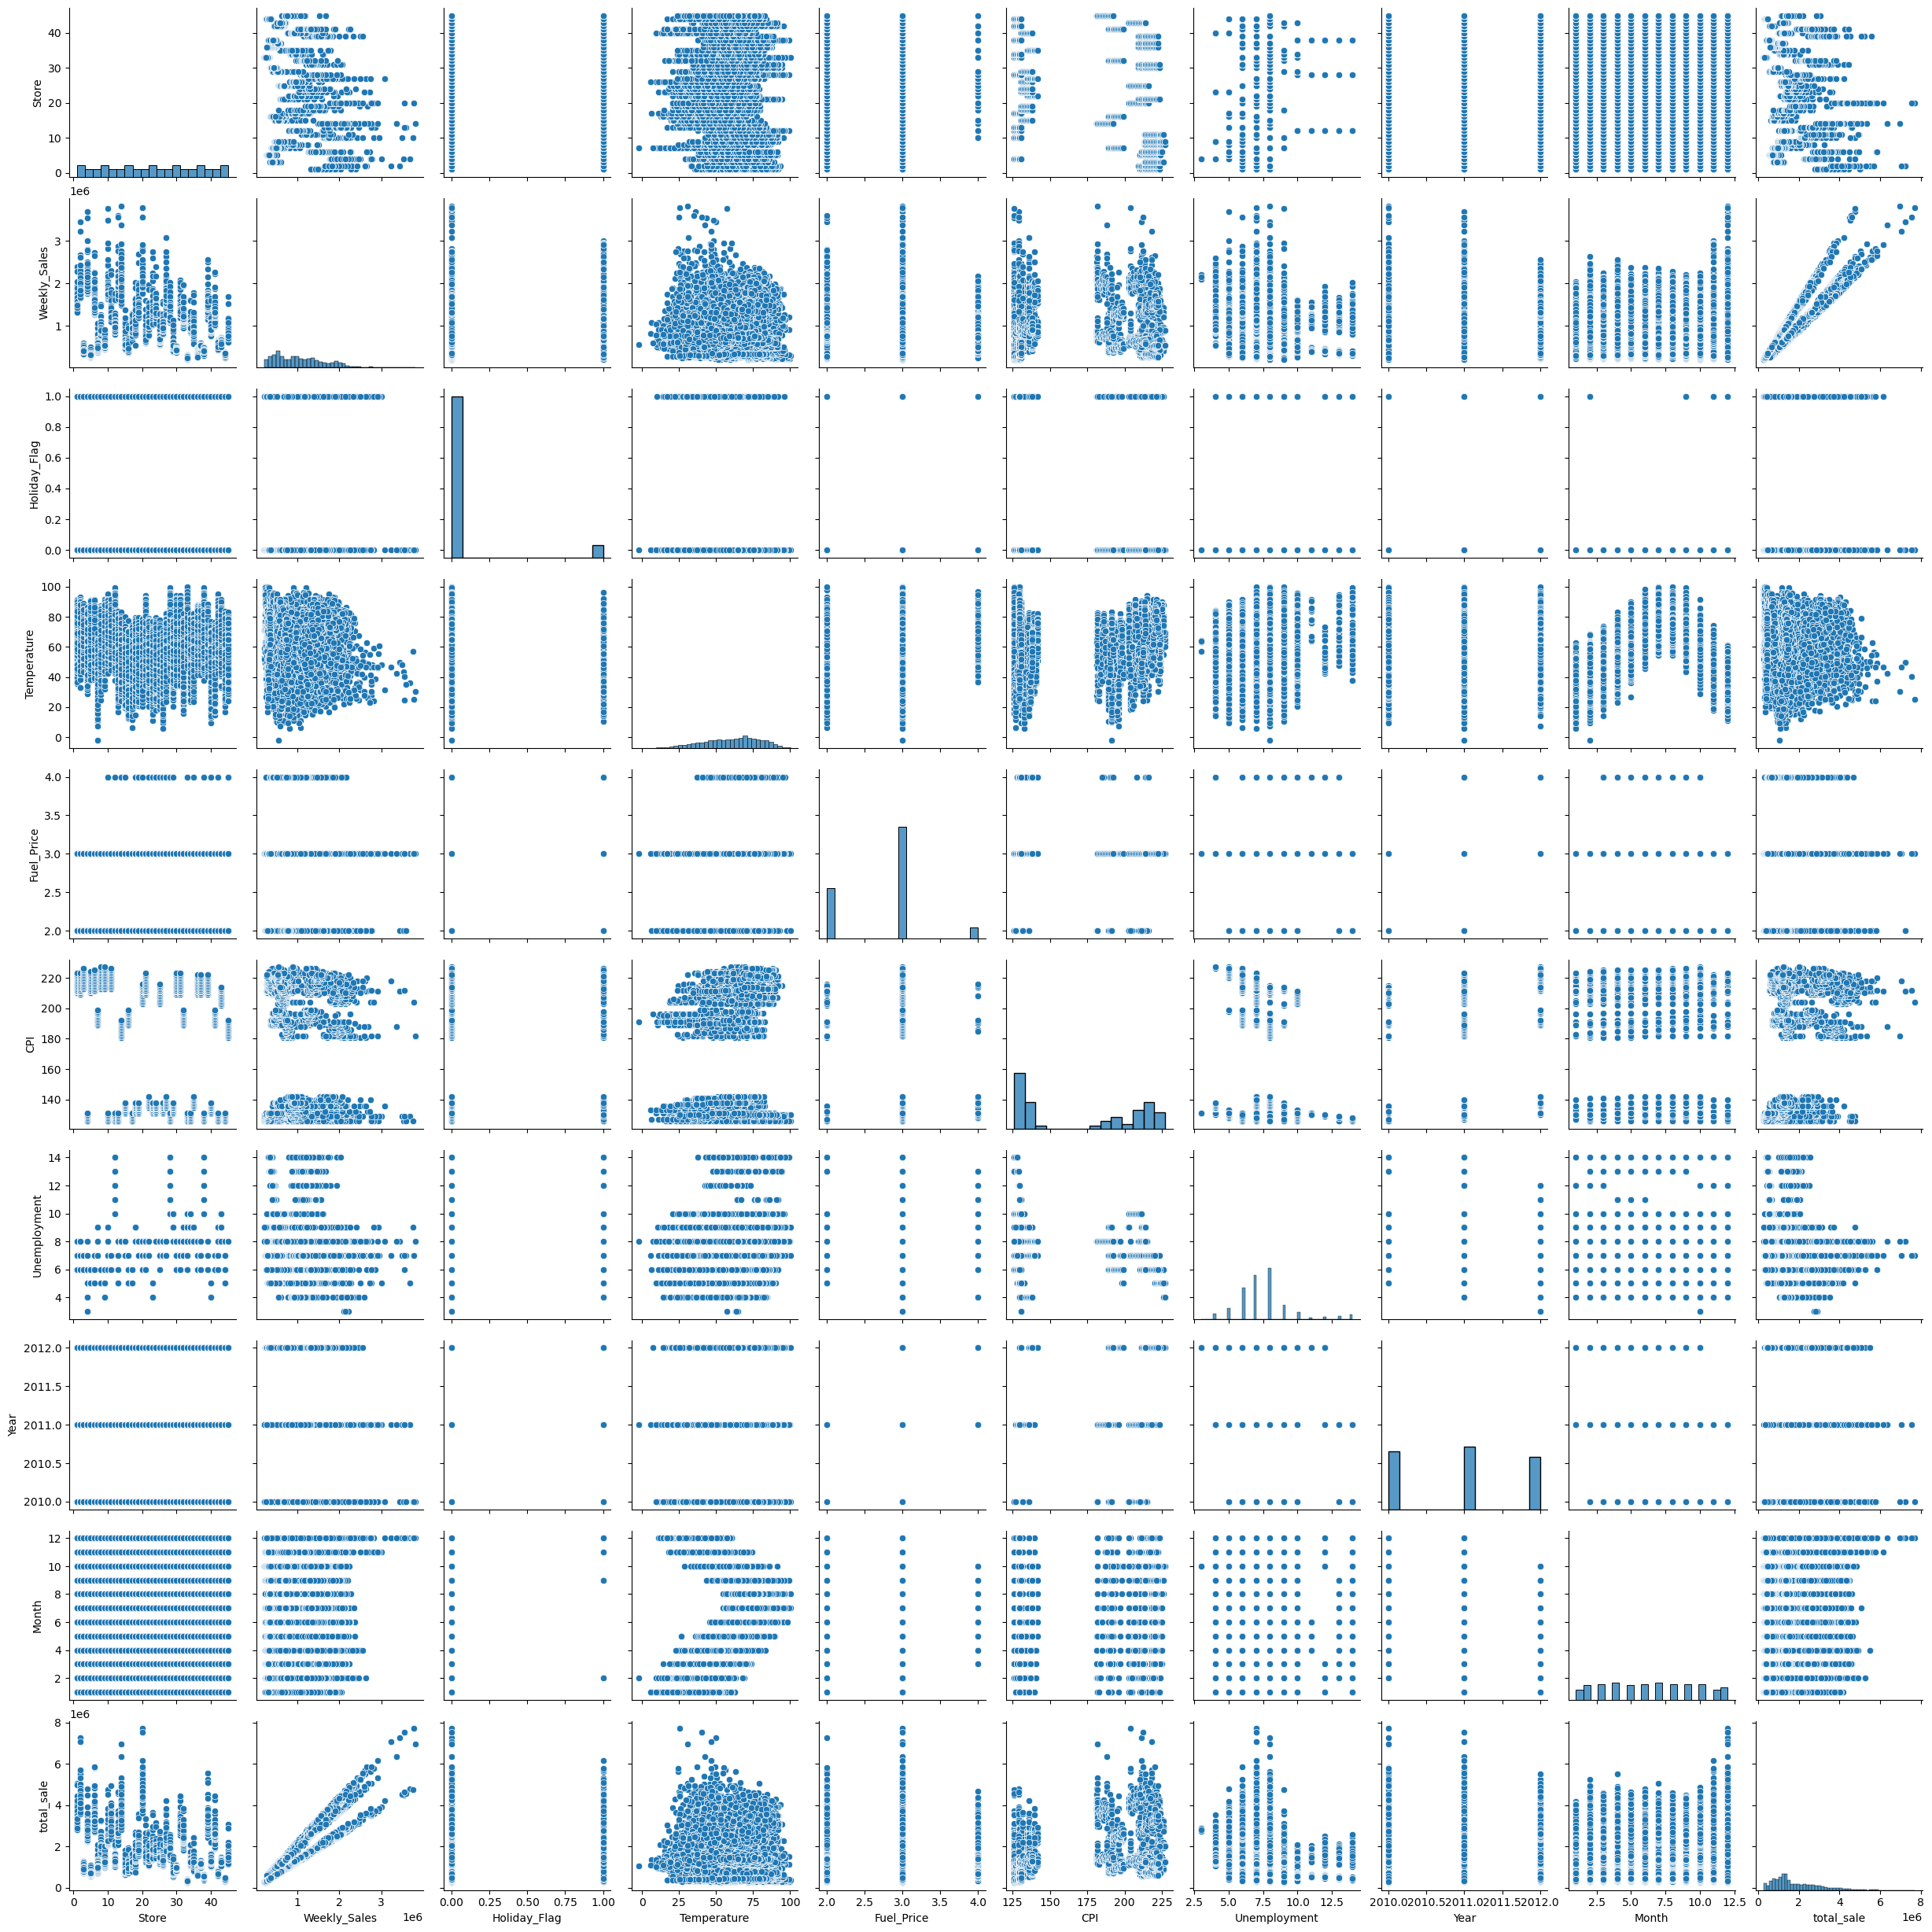

In [124]:
sns.pairplot(data = wal_mart)

<Axes: xlabel='Year', ylabel='total_sale'>

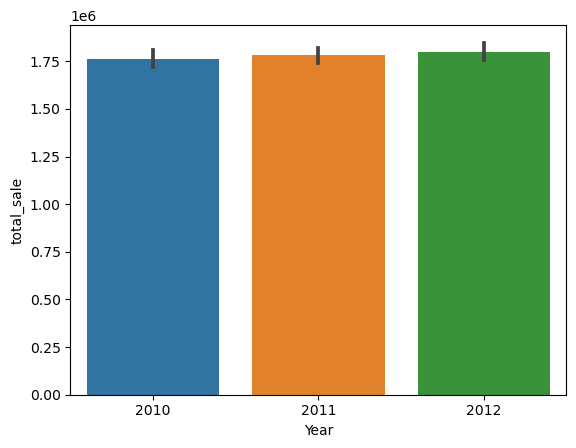

In [129]:
sns.barplot(x = 'Year',y = 'total_sale',data = wal_mart)

<Axes: xlabel='Month', ylabel='total_sale'>

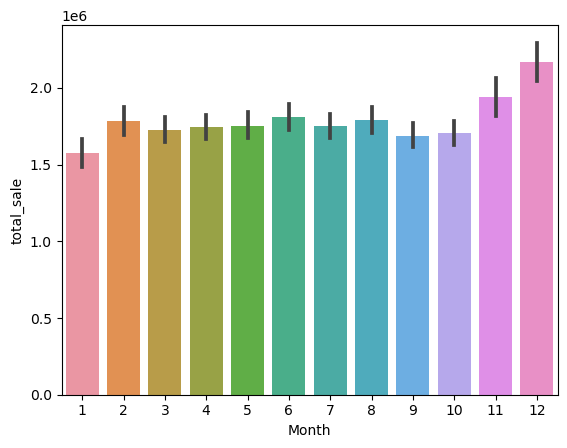

In [130]:
sns.barplot(x = 'Month',y = 'total_sale',data = wal_mart)